# Custom Fuctions Of Scikit Learn

```python
import numpy as np
from itertools import combinations_with_replacement



class LinearRegressionOLS:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        self.beeta_ = None

    def fit(self, x_train, y_train):
        x_train = np.insert(x_train, 0, 1, axis = 1)
        self.beeta_ = np.linalg.pinv(np.dot(x_train.T, x_train)) @ np.dot(x_train.T, y_train)
        self.intercept_ = self.beeta_[0]
        self.coef_ = self.beeta_[1:]

    def predict(self, x_test):
        x_test = np.insert(x_test, 0, 1, axis=1)
        return np.dot(x_test, self.beeta_)




class PolynomialLinearRegression:
    def __init__(self, degree = 2):
        self.degree = degree
        self.intercept_ = None
        self.coef_ = None
        self.beta_ = None

    def create_polynomial_faetures(self, x):
        n_samples, n_features = x.shape
        self.combinations_list = []
        for deg in range(self.degree+1):
            self.combinations_list.extend(list(combinations_with_replacement(range(n_features), deg)))
        self.x_poly = np.ones((n_samples, len(self.combinations_list)))    
        
        for i, comb in enumerate(self.combinations_list):
            if (len(comb) > 0):
                self.x_poly[:, i] = np.prod(x[:, comb], axis = 1)
        return self.x_poly
        
    def fit(self, x_train, y_train):    
        self.x_train_poly = self.create_polynomial_faetures(x_train)
        self.beta_ = np.dot(np.linalg.pinv(self.x_train_poly), y_train) 
        self.intercept_ = self.beta_[0]
        self.coef_ = self.beta_[1:]

    def predict(self, x_test):
        self.x_test_poly = self.create_polynomial_faetures(x_test)
        return np.dot(self.x_test_poly, self.beta_)




class LinearRegressionBatchGD:
    
    def __init__(self, learning_rate = 0.001, epochs = 1000):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,x_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(x_train.shape[1])
        
        for i in range(self.epochs):
            y_hat = np.dot(x_train,self.coef_) + self.intercept_
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = (-2/x_train.shape[0]) * np.dot((y_train - y_hat),x_train)
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
    
    def predict(self,x_test):
        return np.dot(x_test,self.coef_) + self.intercept_




class SGDRidgeRegression:
    def __init__(self, learning_rate = 0.01, epochs = 1000, alpha = 0.01):
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.intercept_ = 0
        self.coef_ = np.ones(n_features)
        for i in range(self.epochs):
            for j in range(n_samples):
                self.idx = np.random.randint(low = 0, high = n_samples)
                self.subtr = y_train - (self.intercept_ + np.dot(x_train, self.coef_))
                
                self.intercept_grad = -2 * np.mean(self.subtr)
                self.intercept_ = self.intercept_ - (self.lr * self.intercept_grad)

                self.coef_grad = (-2/n_samples) * (np.dot(self.subtr, x_train)) + self.alpha * self.coef_
                self.coef_ = self.coef_ - (self.lr * self.coef_grad)

    def predict(self, x_test):
        return np.dot(x_test,self.coef_) + self.intercept_        



class SGDLassoRegression:
    def __init__(self, learning_rate = 0.01, epochs = 1000, alpha = 0.01):
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.intercept_ = 0
        self.coef_ = np.ones(n_features)
        for i in range(self.epochs):
            for j in range(n_samples):
                self.idx = np.random.randint(low = 0, high = n_samples)
                self.subtr = y_train - (self.intercept_ + np.dot(x_train, self.coef_))
                
                self.intercept_grad = -2 * np.mean(self.subtr)
                self.intercept_ = self.intercept_ - (self.lr * self.intercept_grad)

                self.coef_grad = (-2/n_samples) * (np.dot(self.subtr, x_train)) + self.alpha * np.sign(self.coef_)
                self.coef_ = self.coef_ - (self.lr * self.coef_grad)

    def predict(self, x_test):
        return np.dot(x_test,self.coef_) + self.intercept_ 



class SGDElasticRegression:
    def __init__(self, learning_rate = 0.01, epochs = 1000, alpha = 1.0, l1_ratio = 0.5):
        self.lr = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.coef_ = None
        self.intercept_ = None

    def fit(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.intercept_ = 0
        self.coef_ = np.ones(n_features)
        for i in range(self.epochs):
            for j in range(n_samples):
                self.idx = np.random.randint(low = 0, high = n_samples)
                self.subtr = y_train - (self.intercept_ + np.dot(x_train, self.coef_))

                l1_penality = self.l1_ratio * np.sign(self.coef_)
                l2_penality = (1 - self.l1_ratio) * self.coef_
                self.intercept_grad = -2 * np.mean(self.subtr)
                self.intercept_ = self.intercept_ - (self.lr * self.intercept_grad)

                self.coef_grad = (-2/n_samples) * (np.dot(self.subtr, x_train)) + self.alpha(l1_penality+l2_penality)
                self.coef_ = self.coef_ - (self.lr * self.coef_grad)

    def predict(self, x_test):
        return np.dot(x_test,self.coef_) + self.intercept_                 
```    

# Custom Metrics Of Linear Regression

```python
import numpy as np


def custom_mean_absolute_error(y_test, y_pred):
    return np.mean(abs(y_test- y_pred))



def custom_mean_squared_error(y_test, y_pred):
    return np.mean((y_test- y_pred)**2)  



def custom_mean_squared_error(y_test, y_pred):
    return np.mean(((y_test- y_pred)**2)**0.5)        



def custom_r2_score(y_test, y_pred):
    ssr = sum((y_test - y_pred)**2) 
    ssm = sum((y_test - y_test.mean())**2) 
    r2_score = 1 - (ssr/ssm)
    return r2_score



def custom_adjusted_r2_score(x_test, y_test, y_pred):
    ssr = sum((y_test - y_pred)**2) 
    ssm = sum((y_test - y_test.mean())**2) 
    r2_score = 1 - (ssr/ssm)

    n_samples, n_features = x_test.shape
    adjusted_r2_score = 1 - (((1-r2_score)*(n_samples-1))/(n_samples-n_features-1))
    return adjusted_r2_score
```    

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cleanedfinal.csv")

In [3]:
df

,age,female,male,bmi,children,no_smoker,is_smoker,southeast,southwest,northwest,northeast,expenses
0,-1.508048,1.0,0.0,-0.458931,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.303315
1,-1.508048,0.0,1.0,0.508965,1.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.952756
2,-0.796280,0.0,1.0,0.377724,3.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.727059
3,-0.440396,0.0,1.0,-1.311992,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.725852
4,-0.511573,0.0,1.0,-0.294881,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.775331
...,...,...,...,...,...,...,...,...,...,...,...,...
1324,0.769609,0.0,1.0,0.049624,3.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.217393
1325,-1.508048,1.0,0.0,0.197269,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.912948
1326,-1.508048,1.0,0.0,1.017520,0.0,1.0,0.0,1.0,0.0,0.0,0.0,-0.960687
1327,-1.294517,1.0,0.0,-0.803437,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.929357


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:-1], df.iloc[:, -1], test_size = 0.2, random_state = 3)

## Best Possible Value Of Hyperparameters

`Hyperparameters Values From Polynomial Regression`

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
degree = [1,2,3,4]
poly_loss = []

In [7]:
for deg in degree:
    pltf = PolynomialFeatures(degree = deg, include_bias = True)
    x_train_multi = pltf.fit_transform(x_train)
    x_test_multi = pltf.transform(x_test)
    
    plr = LinearRegression()
    plr.fit(x_train_multi, y_train)
    y_pred_ph = plr.predict(x_test_multi)
    
    poly_loss_ind = mean_squared_error(y_test, y_pred_ph)
    poly_loss.append(poly_loss_ind)

In [8]:
minimum_loss_from_poly_regression = min(poly_loss)
ind_ply = poly_loss.index(minimum_loss_from_poly_regression)

print(f"minimum loss is : {minimum_loss_from_poly_regression} from value of hyperparameters is : \ndegree : {degree[ind_ply]}")

minimum loss is : 0.1714624002480744 from value of hyperparameters is : 
degree : 2


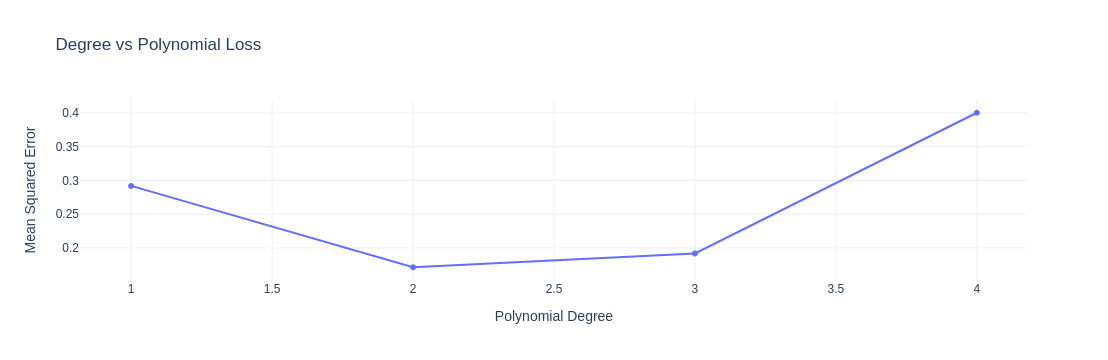

In [9]:
from plotly import graph_objs as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(degree),
    y=poly_loss,
    mode='lines+markers'
))

fig.update_layout(
    title="Degree vs Polynomial Loss",
    xaxis_title="Polynomial Degree",
    yaxis_title="Mean Squared Error",
    template="plotly_white"
)

fig.show()

`Hyperparameters Values From Ridge Regression`

In [10]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
alpha = [0.01, 0.06, 0.001, 0.006]
epochs = [100, 500, 1000, 1100] 
learning_rate = [0.01, 0.001, 0.01, 0.001]
ridge_loss = []

In [12]:
for i in range(len(alpha)):
    sgd_l2 = SGDRegressor(
        loss="squared_error",
        penalty="l2",
        alpha=alpha[i],         
        learning_rate="constant",
        eta0=learning_rate[i],
        max_iter=epochs[i],
        random_state=42
    )
    
    sgd_l2.fit(x_train, y_train)
    y_pred_sgd_l2_param = sgd_l2.predict(x_test)
    ridge_loss_ind = mean_squared_error(y_test, y_pred_sgd_l2_param)
    ridge_loss.append(ridge_loss_ind)

In [13]:
minimum_loss_from_ridge_regression = min(ridge_loss)
ind_rid = ridge_loss.index(minimum_loss_from_ridge_regression)

print(f"minimum loss is : {minimum_loss_from_ridge_regression} from value of hyperparameters is : \npenality : {alpha[ind_rid]}, learning rate is : {learning_rate[ind_rid]} and epochs : {epochs[ind_rid]}")

minimum loss is : 0.2920968098703828 from value of hyperparameters is : 
penality : 0.01, learning rate is : 0.01 and epochs : 100


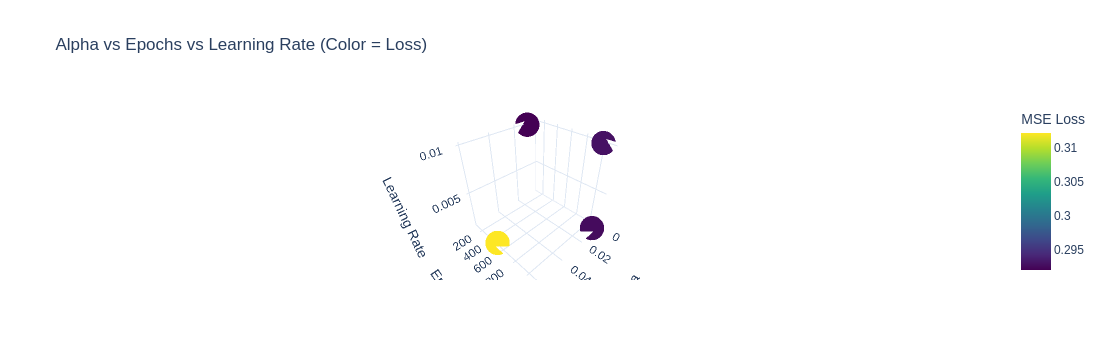

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=alpha,
    y=epochs,
    z=learning_rate,
    mode='markers',
    marker=dict(
        size=8,
        color=ridge_loss,
        colorscale='Viridis',
        colorbar=dict(title='MSE Loss'),
        showscale=True
    )
)])

fig.update_layout(
    title="Alpha vs Epochs vs Learning Rate (Color = Loss)",
    scene=dict(
        xaxis_title='Alpha',
        yaxis_title='Epochs',
        zaxis_title='Learning Rate'
    ),
    template="plotly_white"
)

fig.show()

`Hyperparameters Values From Lasso Regression`

In [15]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [16]:
alpha = [0.01, 0.06, 0.001, 0.006]
epochs = [100, 500, 1000, 1100] 
learning_rate = [0.01, 0.001, 0.01, 0.001]
lasso_loss = []

In [17]:
for i in range(len(alpha)):
    sgd_l1 = SGDRegressor(
        loss="squared_error",
        penalty="l1",
        alpha=alpha[i],         
        learning_rate="constant",
        eta0=learning_rate[i],
        max_iter=epochs[i],
        random_state=42
    )
    
    sgd_l1.fit(x_train, y_train)
    y_pred_sgd_l1_param = sgd_l1.predict(x_test)
    lasso_loss_ind = mean_squared_error(y_test, y_pred_sgd_l1_param)
    lasso_loss.append(lasso_loss_ind)

In [18]:
minimum_loss_from_lasso_regression = min(lasso_loss)
ind_laso = lasso_loss.index(minimum_loss_from_lasso_regression)

print(f"minimum loss is : {minimum_loss_from_lasso_regression} from value of hyperparameters is : \npenality : {alpha[ind_laso]}, learning rate is : {learning_rate[ind_laso]} and epochs : {epochs[ind_laso]}")

minimum loss is : 0.29210252731441744 from value of hyperparameters is : 
penality : 0.006, learning rate is : 0.001 and epochs : 1100


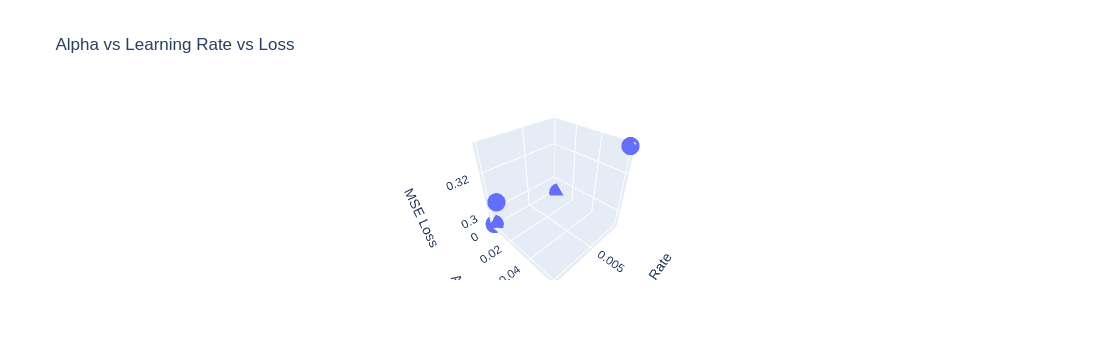

In [19]:
fig = go.Figure(data=[go.Scatter3d(
    x=learning_rate,
    y=alpha,
    z=lasso_loss,
    mode='markers',
    marker=dict(size=6)
)])

fig.update_layout(
    title="Alpha vs Learning Rate vs Loss",
    scene=dict(
        xaxis_title='Learning Rate',
        yaxis_title='Alpha',
        zaxis_title='MSE Loss'
    )
)

fig.show()

`Hyperparameters Values From Elasticnet Regression`

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [21]:
alpha = [0.01, 0.06, 0.001, 0.006]
l1_ratio = [0.5, 0.06, 0.001, 0.006]
epochs = [100, 500, 1000, 1100] 
learning_rate = [0.01, 0.001, 0.01, 0.001]
elasticnet_loss = []

In [22]:
for i in range(len(alpha)):  
    sgd_en = SGDRegressor(
        loss="squared_error",
        penalty="elasticnet",
        alpha=alpha[i],      
        l1_ratio=l1_ratio[i],
        learning_rate="constant",
        eta0=learning_rate[i],
        max_iter=epochs[i],
        random_state=42
    )
    
    sgd_en.fit(x_train, y_train)
    y_pred_sgd_en_param = sgd_en.predict(x_test)
    en_loss_ind = mean_squared_error(y_test, y_pred_sgd_en_param)
    elasticnet_loss.append(en_loss_ind)

In [23]:
minimum_loss_from_elasticnet_regression = min(elasticnet_loss)
ind_en = elasticnet_loss.index(minimum_loss_from_elasticnet_regression)

print(f"minimum loss is : {minimum_loss_from_elasticnet_regression} from value of hyperparameters is : \npenality : {alpha[ind_en]}, l1_ration : {l1_ratio[ind_en]}, learning rate is : {learning_rate[ind_en]} and epochs : {epochs[ind_en]}")

minimum loss is : 0.29267689868038915 from value of hyperparameters is : 
penality : 0.006, l1_ration : 0.006, learning rate is : 0.001 and epochs : 1100


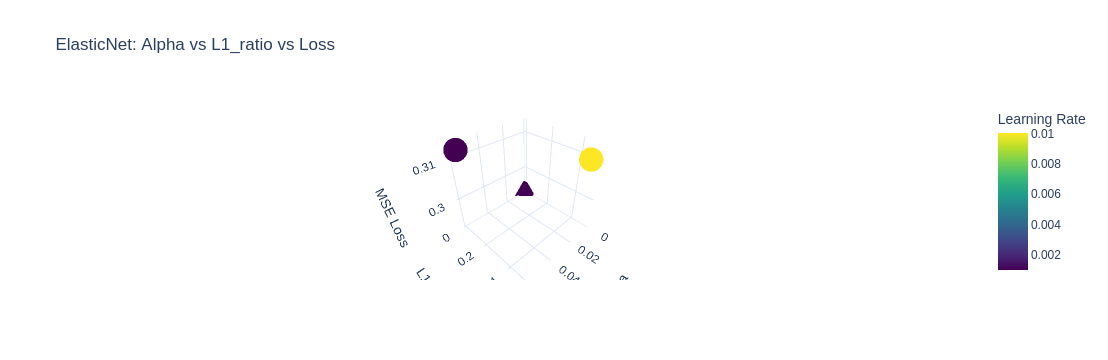

In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=alpha,
    y=l1_ratio,
    z=elasticnet_loss,
    mode='markers',
    marker=dict(
        size=8,
        color=learning_rate,
        colorscale='Viridis',
        colorbar=dict(title='Learning Rate'),
        showscale=True
    )
)])

fig.update_layout(
    title="ElasticNet: Alpha vs L1_ratio vs Loss",
    scene=dict(
        xaxis_title='Alpha',
        yaxis_title='L1 Ratio',
        zaxis_title='MSE Loss'
    ),
    template="plotly_white"
)

fig.show()

## Multiple Linear Regression

`mannual function of linear regression`

In [25]:
from CustomLR import LinearRegressionOLS

y_hlros = LinearRegressionOLS()
y_hlros.fit(x_train, y_train)
y_hlros_pred = y_hlros.predict(x_test)
print("slopes of line from simple linear regression is :", y_hlros.coef_)
print("intercept of line from simple linear regression is :", y_hlros.intercept_)

slopes of line from simple linear regression is : [ 2.90958109e-01  1.32734437e-01  1.09688911e-01  1.72606138e-01
  3.83602424e-02 -8.64864218e-01  1.10728757e+00  6.71372986e-04
  5.02299821e-02  6.85655439e-02  1.22956449e-01]
intercept of line from simple linear regression is : 0.242423347753595


In [26]:
from CustomMetrics import custom_mean_absolute_error, custom_mean_squared_error, custom_r2_score, custom_adjusted_r2_score

print("mean absolute error of model from custom class of simple linear regression is :", custom_mean_absolute_error(y_test, y_hlros_pred))
print("mean squared error of model from custom class of simple linear regression is :", custom_mean_squared_error(y_test, y_hlros_pred))
print("root maen squared error of model from custom class of simple linear regression is :", custom_mean_squared_error(y_test, y_hlros_pred))
print("r2_score of model from custom class of simple linear regression is :", custom_r2_score(y_test, y_hlros_pred))
print("adjusted r2_score of model from custom class of simple linear regression is :", custom_adjusted_r2_score(x_test, y_test, y_hlros_pred))

mean absolute error of model from custom class of simple linear regression is : 0.38660328617957274
mean squared error of model from custom class of simple linear regression is : 0.38660328617957274
root maen squared error of model from custom class of simple linear regression is : 0.38660328617957274
r2_score of model from custom class of simple linear regression is : 0.7334699465405943
adjusted r2_score of model from custom class of simple linear regression is : 0.7219273064301476


`sklearn simple linear regression`

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("slopes of line from simple linear regression is :", lr.coef_)
print("intercept of line from simple linear regression is :", lr.intercept_)

slopes of line from simple linear regression is : [ 0.29095811  0.01152276 -0.01152276  0.17260614  0.03836024 -0.98607589
  0.98607589 -0.05993446 -0.01037585  0.00795971  0.06235061]
intercept of line from simple linear regression is : 0.5454525324455868


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("mean absolute error in simple linear regression :", mean_absolute_error(y_test, y_pred_lr))
print("mean squared error in simple linear regression :", mean_squared_error(y_test, y_pred_lr))
print("r2_score in simple linear regression :", r2_score(y_test, y_pred_lr))

mean absolute error in simple linear regression : 0.38660328617957174
mean squared error in simple linear regression : 0.2919739377364579
r2_score in simple linear regression : 0.7334699465405943


## Gradient Descent

`mannual batch gradient descent function`

In [29]:
from CustomLR import SGDRidgeRegression

cbg = SGDRidgeRegression(learning_rate = 0.01, epochs = 2, alpha = 0)
cbg.fit(x_train, y_train)
cbg_pred = cbg.predict(x_test)

In [30]:
from CustomMetrics import custom_mean_absolute_error, custom_mean_squared_error, custom_r2_score, custom_adjusted_r2_score

print("mean absolute error of model from custom class of gradient descent lr is :", custom_mean_absolute_error(y_test, cbg_pred))
print("mean squared error of model from custom class of gradient descent lr is :", custom_mean_squared_error(y_test, cbg_pred))
print("root maen squared error of model from custom class of gradient descent lr is :", custom_mean_squared_error(y_test, cbg_pred))
print("r2_score of model from custom class of gradient descent lr is :", custom_r2_score(y_test, cbg_pred))
print("adjusted r2_score of model from custom class of gradient descent lr is :", custom_adjusted_r2_score(x_test, y_test, cbg_pred))

mean absolute error of model from custom class of gradient descent lr is : 0.38660337273854817
mean squared error of model from custom class of gradient descent lr is : 0.38660337273854817
root maen squared error of model from custom class of gradient descent lr is : 0.38660337273854817
r2_score of model from custom class of gradient descent lr is : 0.7334702645644465
adjusted r2_score of model from custom class of gradient descent lr is : 0.7219276382266864


## Polynomial Linear Regression

`mannual funtion of polynomial linear regression`

In [31]:
from CustomLR import PolynomialLinearRegression
lr_poly = PolynomialLinearRegression(degree = 2)
lr_poly.fit(np.array(x_train), np.array(y_train))
lr_poly_pred = lr_poly.predict(np.array(x_test)) 

print("slopes of line from custom class of polynomial linear regression is :", lr_poly.coef_)
print("intercept of line from custom class of polynomial linear regression is :", lr_poly.intercept_)

slopes of line from custom class of polynomial linear regression is : [ 1.24466339e-01  6.72076358e-02  5.20605189e-02  1.73504983e-01
  3.32234850e-02 -2.99631205e-01  4.18899360e-01  1.11146474e-02
  3.45937166e-02  2.32967241e-02  5.02630667e-02  7.41868177e-02
  4.37501617e-02  8.07161773e-02  3.81333300e-03 -2.35046775e-03
  7.22969063e-02  5.21694327e-02  6.25764273e-02  5.28895006e-02
  1.06022761e-02 -1.60186500e-03  6.72076358e-02  5.44712852e-17
  8.17057111e-02  2.21492622e-02 -1.51842392e-01  2.19050027e-01
 -2.69615937e-02  1.99139058e-02  1.44130654e-02  5.98422583e-02
  5.20605189e-02  9.17992718e-02  1.10742228e-02 -1.47788813e-01
  1.99849332e-01  3.80762410e-02  1.46798108e-02  8.88365875e-03
 -9.57919162e-03 -2.35653321e-02  5.30166963e-04 -2.78725956e-01
  4.52230939e-01 -5.76217937e-03  4.14519650e-02  5.47519507e-02
  8.30632466e-02 -6.59225621e-03  1.67704693e-02  1.64530156e-02
  4.63742545e-03 -2.07911746e-02  3.26854521e-02  1.66917821e-02
 -2.99631205e-01  0.

In [32]:
from CustomMetrics import custom_mean_absolute_error, custom_mean_squared_error, custom_r2_score, custom_adjusted_r2_score

print("mean absolute error of model from custom class of polynomial regression is :", custom_mean_absolute_error(y_test, lr_poly_pred))
print("mean squared error of model from custom class of polynomial regression is :", custom_mean_squared_error(y_test, lr_poly_pred))
print("root maen squared error of model from custom class of polynomial regression is :", custom_mean_squared_error(y_test, lr_poly_pred))
print("r2_score of model from custom class of polynomial regression is :", custom_r2_score(y_test, lr_poly_pred))
print("adjusted r2_score of model from custom class of polynomial regression is :", custom_adjusted_r2_score(x_test, y_test, lr_poly_pred))

mean absolute error of model from custom class of polynomial regression is : 0.2552159985639032
mean squared error of model from custom class of polynomial regression is : 0.2552159985639032
root maen squared error of model from custom class of polynomial regression is : 0.2552159985639032
r2_score of model from custom class of polynomial regression is : 0.8434795822576227
adjusted r2_score of model from custom class of polynomial regression is : 0.8367011389695669


`sklearn polynomial linear regression`

In [33]:
from sklearn.preprocessing import PolynomialFeatures

pltf = PolynomialFeatures(degree = 2, include_bias = True)
x_train_multi = pltf.fit_transform(x_train)
x_test_multi = pltf.transform(x_test)
print("input features taken by curve is :", pltf.n_features_in_)
print("output features of curve is :", pltf.n_output_features_)
print("degree of curve is :", pltf.degree)

input features taken by curve is : 11
output features of curve is : 78
degree of curve is : 2


In [34]:
from sklearn.linear_model import LinearRegression

plr = LinearRegression()
plr.fit(x_train_multi, y_train)
y_pred_plr = plr.predict(x_test_multi)
print("slopes of line from polynomial linear regression is :", plr.coef_)
print("intercept of line from polynomial linear regression is :", plr.intercept_)

slopes of line from polynomial linear regression is : [ 8.06745697e-18  1.24466339e-01  7.57355843e-03 -7.57355843e-03
  1.73504983e-01  3.32234850e-02 -3.59265282e-01  3.59265282e-01
 -1.87023913e-02  4.77667790e-03 -6.52031458e-03  2.04460280e-02
  7.41868177e-02  4.37501617e-02  8.07161773e-02  3.81333300e-03
 -2.35046775e-03  7.22969063e-02  5.21694327e-02  6.25764273e-02
  5.28895006e-02  1.06022761e-02 -1.60186500e-03  7.57355843e-03
 -2.77555756e-17  8.17057111e-02  2.21492622e-02 -1.81659430e-01
  1.89232989e-01 -4.18701130e-02  5.00538647e-03 -4.95453988e-04
  4.49337390e-02 -7.57355843e-03  9.17992718e-02  1.10742228e-02
 -1.77605852e-01  1.70032294e-01  2.31677217e-02 -2.28708575e-04
 -6.02486059e-03 -2.44877110e-02 -2.35653321e-02  5.30166963e-04
 -2.78725956e-01  4.52230939e-01 -5.76217937e-03  4.14519650e-02
  5.47519507e-02  8.30632466e-02 -6.59225621e-03  1.67704693e-02
  1.64530156e-02  4.63742545e-03 -2.07911746e-02  3.26854521e-02
  1.66917821e-02 -3.59265282e-01  0.

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("mean absolute error in polynomial regression :", mean_absolute_error(y_test, y_pred_plr))
print("mean squared error in polynomial regression :", mean_squared_error(y_test, y_pred_plr))
print("r2_score in polynomial regression :", r2_score(y_test, y_pred_plr))

mean absolute error in polynomial regression : 0.2552159985639032
mean squared error in polynomial regression : 0.1714624002480744
r2_score in polynomial regression : 0.8434795822576225


## Ridge And Laaso Regression With Stochastic Gradient Descent

### Ridge Regression

`mannual function of ridge regression with stochastic gradient descent`

In [36]:
from CustomLR import SGDRidgeRegression

rsgd = SGDRidgeRegression(learning_rate = 0.01, epochs = 2, alpha = 0.01)
rsgd.fit(x_train, y_train)
y_resgd_pred = rsgd.predict(x_test)

print("slopes of line from stochastic gd with ridge regression is :", rsgd.coef_)
print("intercept of line from stochastic gd with ridge regression is :", rsgd.intercept_)

slopes of line from stochastic gd with ridge regression is : [ 0.28915813  0.44037611  0.42012262  0.17128527  0.04091125 -0.53712579
  1.39762452  0.56322995  0.60881903  0.62559388  0.67979761]
intercept of line from stochastic gd with ridge regression is : -0.9518759772988541


In [37]:
from CustomMetrics import custom_mean_absolute_error, custom_mean_squared_error, custom_r2_score, custom_adjusted_r2_score

print("mean absolute error of model from stochastic gd with ridge regression is :", custom_mean_absolute_error(y_test, y_resgd_pred))
print("mean squared error of model from stochastic gd with ridge regression is :", custom_mean_squared_error(y_test, y_resgd_pred))
print("root maen squared error of model from stochastic gd with ridge regression is :", custom_mean_squared_error(y_test, y_resgd_pred))
print("r2_score of model from stochastic gd with ridge regression is :", custom_r2_score(y_test, y_resgd_pred))
print("adjusted r2_score of model from stochastic gd with ridge regression is :", custom_adjusted_r2_score(x_test, y_test, y_resgd_pred))

mean absolute error of model from stochastic gd with ridge regression is : 0.3881231094747093
mean squared error of model from stochastic gd with ridge regression is : 0.3881231094747093
root maen squared error of model from stochastic gd with ridge regression is : 0.3881231094747093
r2_score of model from stochastic gd with ridge regression is : 0.733380915070756
adjusted r2_score of model from stochastic gd with ridge regression is : 0.7218344192667336


`scikit learn ridge regression`

In [38]:
from sklearn.linear_model import SGDRegressor

sgd_l2 = SGDRegressor(
    loss="squared_error",
    penalty="l2",
    alpha=0.01,         
    learning_rate="constant",
    eta0=0.01,
    max_iter=1000,
    random_state=42
)

sgd_l2.fit(x_train, y_train)
y_pred_sgd_l2 = sgd_l2.predict(x_test)
print("Coefficient of line from stochastic gd with ridge regression :", sgd_l2.coef_)
print("Intercept of line from stochastic gd with ridge regression :", sgd_l2.intercept_)

Coefficient of line from stochastic gd with ridge regression : [ 0.36230097  0.09693134  0.09145583  0.15876265  0.03077865 -0.88710606
  1.07549323 -0.02194057  0.00501608  0.09531804  0.10999363]
Intercept of line from stochastic gd with ridge regression : [0.32761898]


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("mean absolute error in stochastic gd with ridge regression :", mean_absolute_error(y_test, y_pred_sgd_l2))
print("mean squared error in stochastic gd with ridge regression :", mean_squared_error(y_test, y_pred_sgd_l2))
print("r2_score in stochastic gd with ridge regression :", r2_score(y_test, y_pred_sgd_l2))

mean absolute error in stochastic gd with ridge regression : 0.3864438332092429
mean squared error in stochastic gd with ridge regression : 0.2920968098703828
r2_score in stochastic gd with ridge regression : 0.7333577820211253


### Lasso Regression

`mannual function of lasso regression with stochastic gradient descent`

In [40]:
from CustomLR import SGDLassoRegression

lsgd = SGDLassoRegression(learning_rate = 0.01, epochs = 2, alpha = 0.01)
lsgd.fit(x_train, y_train)
y_losgd_pred = lsgd.predict(x_test)

print("slopes of line from stochastic gd with lasso regression is :", lsgd.coef_)
print("intercept of line from stochastic gd with lasso regression is :", lsgd.intercept_)

slopes of line from stochastic gd with lasso regression is : [ 0.28617225  0.34347903  0.32358964  0.16737041  0.03873521 -0.42377723
  1.50764589  0.5051426   0.54964501  0.56593858  0.62114248]
intercept of line from stochastic gd with lasso regression is : -0.9077313310303364


In [41]:
from CustomMetrics import custom_mean_absolute_error, custom_mean_squared_error, custom_r2_score, custom_adjusted_r2_score

print("mean absolute error of model from stochastic gd with lasso regression is :", custom_mean_absolute_error(y_test, y_losgd_pred))
print("mean squared error of model from stochastic gd with lasso regression is :", custom_mean_squared_error(y_test, y_losgd_pred))
print("root maen squared error of model from stochastic gd with lasso regression is :", custom_mean_squared_error(y_test, y_losgd_pred))
print("r2_score of model from stochastic gd with lasso regression is :", custom_r2_score(y_test, y_losgd_pred))
print("adjusted r2_score of model from stochastic gd with lasso regression is :", custom_adjusted_r2_score(x_test, y_test, y_losgd_pred))

mean absolute error of model from stochastic gd with lasso regression is : 0.38723517988808703
mean squared error of model from stochastic gd with lasso regression is : 0.38723517988808703
root maen squared error of model from stochastic gd with lasso regression is : 0.38723517988808703
r2_score of model from stochastic gd with lasso regression is : 0.7331192453610642
adjusted r2_score of model from stochastic gd with lasso regression is : 0.7215614174042599


`scikit learn lasso regression`

In [42]:
from sklearn.linear_model import SGDRegressor

sgd_l1 = SGDRegressor(
    loss="squared_error",
    penalty="l1",
    alpha=0.01,
    learning_rate="constant",
    eta0=0.01,
    max_iter=1000,
    random_state=42
)

sgd_l1.fit(x_train, y_train)
y_pred_sgd_l1 = sgd_l1.predict(x_test)

print("Coefficient of line from stochastic gd with lasso regression :", sgd_l1.coef_)
print("intercept of line from stochastic gd with lasso regression :", sgd_l1.intercept_)

Coefficient of line from stochastic gd with lasso regression : [ 0.25881031  0.          0.          0.1678934   0.01963518 -0.77561051
  1.04206911  0.          0.          0.          0.        ]
intercept of line from stochastic gd with lasso regression : [0.2664586]


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("mean absolute error from stochastic gd with lasso regression :", mean_absolute_error(y_test, y_pred_sgd_l1))
print("mean squared error from stochastic gd with lasso regression :", mean_squared_error(y_test, y_pred_sgd_l1))
print("r2_score from stochastic gd with lasso regression :", r2_score(y_test, y_pred_sgd_l1))

mean absolute error from stochastic gd with lasso regression : 0.37252693139050835
mean squared error from stochastic gd with lasso regression : 0.30896628945819726
r2_score from stochastic gd with lasso regression : 0.7179583825705109


### Elastic Net

`mannual function of elasticnet regression with stochastic gradient descent`

In [44]:
from CustomLR import SGDElasticRegression

esgd = SGDElasticRegression(learning_rate = 0.01, epochs = 2, alpha = 0.01, l1_ratio = 0.5)
esgd.fit(x_train, y_train)
y_ensgd_pred = lsgd.predict(x_test)

print("slopes of line from stochastic gd with elasticnet regression is :", esgd.coef_)
print("intercept of line from stochastic gd with elasticnet regression is :", esgd.intercept_)        

slopes of line from stochastic gd with elasticnet regression is : [ 0.28766881  0.39416743  0.37409029  0.16933512  0.03980758 -0.48348454
  1.44965682  0.53547789  0.58053754  0.59707765  0.65177453]
intercept of line from stochastic gd with elasticnet regression is : -0.9302809588595842


In [45]:
from CustomMetrics import custom_mean_absolute_error, custom_mean_squared_error, custom_r2_score, custom_adjusted_r2_score

print("mean absolute error of model from stochastic gd with elasticnet regression is :", custom_mean_absolute_error(y_test, y_ensgd_pred))
print("mean squared error of model from stochastic gd with elasticnet regression is :", custom_mean_squared_error(y_test, y_ensgd_pred))
print("root maen squared error of model from stochastic gd with elasticnet regression is :", custom_mean_squared_error(y_test, y_ensgd_pred))
print("r2_score of model from stochastic gd with elasticnet regression is :", custom_r2_score(y_test, y_ensgd_pred))
print("adjusted r2_score of model from stochastic gd with elasticnet regression is :", custom_adjusted_r2_score(x_test, y_test, y_ensgd_pred))

mean absolute error of model from stochastic gd with elasticnet regression is : 0.38723517988808703
mean squared error of model from stochastic gd with elasticnet regression is : 0.38723517988808703
root maen squared error of model from stochastic gd with elasticnet regression is : 0.38723517988808703
r2_score of model from stochastic gd with elasticnet regression is : 0.7331192453610642
adjusted r2_score of model from stochastic gd with elasticnet regression is : 0.7215614174042599


`scikit learn elasticnet regression`

In [46]:
from sklearn.linear_model import SGDRegressor

sgd_en = SGDRegressor(
    loss="squared_error",
    penalty="elasticnet",
    alpha=0.01,
    l1_ratio=0.5,   
    learning_rate="constant",
    eta0=0.01,
    max_iter=1000,
    random_state=42
)

sgd_en.fit(x_train, y_train)
y_pred_en = sgd_en.predict(x_test)

print("Coefficient of line from stochastic gd with elasticnet regression :", sgd_en.coef_)
print("intercept of line from stochastic gd with elasticnet regression :", sgd_en.intercept_)

Coefficient of line from stochastic gd with elasticnet regression : [ 0.26143537  0.          0.          0.17337382  0.02743337 -0.82088851
  1.00109029 -0.05630472  0.          0.          0.01710911]
intercept of line from stochastic gd with elasticnet regression : [0.31091131]


In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("mean absolute error from stochastic gd with elasticnet regression :", mean_absolute_error(y_test, y_pred_en))
print("mean squared error from stochastic gd with elasticnet regression :", mean_squared_error(y_test, y_pred_en))
print("r2_score from stochastic gd with elasticnet regression :", r2_score(y_test, y_pred_en))

mean absolute error from stochastic gd with elasticnet regression : 0.3717654314205528
mean squared error from stochastic gd with elasticnet regression : 0.3111265800115645
r2_score from stochastic gd with elasticnet regression : 0.7159863491721172
